In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class KMeans:

    def __init__(self, k=3, iteration=500):

        self.k=k
        self.iteration=iteration

    def fit(self, X):

        self.X=X

        np.random.seed(0)

        # form k number of empty clusters
        self.cluster = [[] for i in range(self.k)]

        #randomly initialize centroids
        centroid_index = np.random.choice(self.X.shape[0], self.k, replace=False)
        self.centroid = [self.X[i] for i in centroid_index]

        for i in range(self.iteration):

            for index, sample in enumerate(self.X):

                distance = [self.euclidean_distance(sample,c) for c in self.centroid]
                min_index = np.argmin(distance)
                self.cluster[min_index].append(index)

            # recompute the centroids
            for index, sample in enumerate(self.cluster):
                mean_value = np.mean(self.X[sample], axis=0)
                self.centroid[index] = mean_value

    def predict(self):

        labels = np.empty(self.X.shape[0])
        for index, sample  in enumerate(self.cluster):
            for i in sample:
                labels[i] = index
        return labels

    def euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def plot2D(self):

        plt.style.use("ggplot")

        plt.scatter(self.X[:,0], self.X[:,1], c=self.predict(), edgecolor="black", s=30, cmap="plasma")

        for i in self.centroid:
            plt.scatter(*i, c="black", s=70, marker="o", alpha=0.7)

        plt.title("KMeans")
        plt.show()

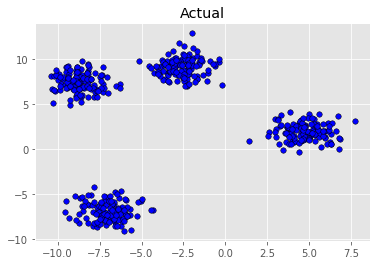

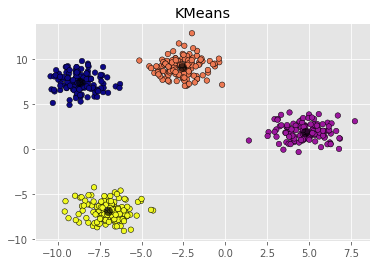

In [3]:
if __name__ == "__main__":

    X, y = make_blobs(centers=4, n_samples=500, n_features=2, random_state=42)

    cluster = len(np.unique(y))

    kmeans = KMeans(k=cluster, iteration=1000)
    kmeans.fit(X)

    plt.style.use("ggplot")
    plt.title("Actual")
    plt.scatter(X[:, 0], X[:, 1], c="blue", edgecolor="black", s=30)
    plt.show()

    kmeans.plot2D()